In [2]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('../input/scour-depth-analysis/scour_datasheet.csv')

In [3]:
df = pd.DataFrame(dataset)
df.describe()

,Pier Width (m),Pier Length (m),Skew (deg),Velocity (m/s),Depth(m),Scour Depth (m),Accuracy (m)
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,1.401643,10.741478,7.685832,1.313758,4.453388,1.013142,0.237988
std,1.431738,4.129075,15.191435,0.802898,3.467934,1.181855,0.110249
min,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000
25%,0.800000,8.200000,0.000000,0.700000,1.900000,0.400000,0.200000
50%,1.000000,10.400000,0.000000,1.100000,3.300000,0.600000,0.200000
75%,1.500000,12.200000,11.000000,1.700000,6.400000,1.100000,0.300000
max,22.900000,27.400000,85.000000,4.500000,22.500000,7.700000,0.900000


In [4]:
# importing all libraries and dependencies for dataframe
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# importing all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# importing all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [5]:
# shape of the data
df.shape

(488, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pier                 487 non-null    object 
 1   Upstream/Downstream  487 non-null    object 
 2   Pier Type            487 non-null    object 
 3   Pier Shape           487 non-null    object 
 4   Pier Width (m)       487 non-null    float64
 5   Pier Length (m)      487 non-null    float64
 6   Skew (deg)           487 non-null    float64
 7   Velocity (m/s)       487 non-null    float64
 8   Depth(m)             487 non-null    float64
 9   Debris Effects       487 non-null    object 
 10  Bed Material         487 non-null    object 
 11  D16 (mm)             487 non-null    object 
 12  D50 (mm)             487 non-null    object 
 13  D84 (mm)             487 non-null    object 
 14  D95 (mm)             487 non-null    object 
 15  Grad                 487 non-null    obj

# Data Processing

**D16 , D50 ,D84 , D95 ,Grad should be converted to float datatype for analysis**

In [7]:
df['D95 (mm)'].dtype

dtype('O')

Empty values should be converted to some number for conversion later on these will be replaced or removed

In [8]:
#all diameter columns will be analysed separatly
for i in df.index:
    if df['D95 (mm)'][i] == '–' or df['D95 (mm)'][i] == '--':
        df['D95 (mm)'][i] = "199999"        
    if df['D16 (mm)'][i] == '–' or df['D16 (mm)'][i] == '--':
        df['D16 (mm)'][i] = "199999" 
    if df['D50 (mm)'][i] == '–' or df['D50 (mm)'][i] == '--':
        df['D50 (mm)'][i] = "199999" 
    if df['D84 (mm)'][i] == '–' or df['D84 (mm)'][i] == '--':
        df['D84 (mm)'][i] = "199999" 
    if df['Grad'][i] == '–' or df['Grad'][i] == '--':
        df['Grad'][i] = "199999" 

In [9]:
df['D95 (mm)'] = df['D95 (mm)'].astype(str)
df['D95 (mm)'] = df['D95 (mm)'].astype(float)
df['D16 (mm)'] = df['D16 (mm)'].astype(str)
df['D16 (mm)'] = df['D16 (mm)'].astype(float)
df['D50 (mm)'] = df['D50 (mm)'].astype(str)
df['D50 (mm)'] = df['D50 (mm)'].astype(float)
df['D84 (mm)'] = df['D84 (mm)'].astype(str)
df['D84 (mm)'] = df['D84 (mm)'].astype(float)
df['Grad'] = df['Grad'].astype(str)
df['Grad'] = df['Grad'].astype(float)

In [10]:
df.dtypes

Pier                   object 
Upstream/Downstream    object 
Pier Type              object 
Pier Shape             object 
Pier Width (m)         float64
Pier Length (m)        float64
Skew (deg)             float64
Velocity (m/s)         float64
Depth(m)               float64
Debris Effects         object 
Bed Material           object 
D16 (mm)               float64
D50 (mm)               float64
D84 (mm)               float64
D95 (mm)               float64
Grad                   float64
Scour Depth (m)        float64
Accuracy (m)           float64
dtype: object

**Dropping Pier Based on Acadamic Knowlage**

In [11]:
# dropping pier based on Acadamic knowledge

df = df.drop('Pier',axis=1)

**Outliers**

**Looking for Outliers**

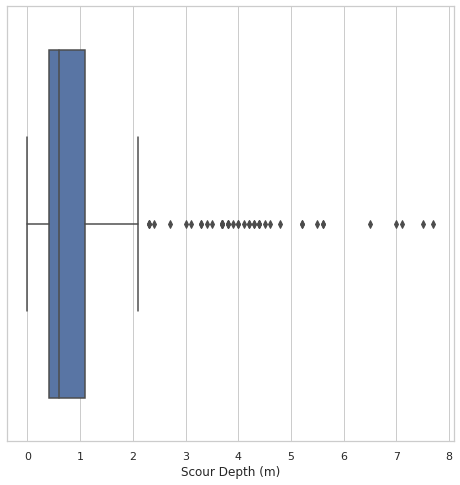

In [12]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Scour Depth (m)"])

**Removing Outliers**

In [13]:
Q1 =  df['Scour Depth (m)'].quantile(0.25)
Q3 = df['Scour Depth (m)'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers from data bsed on price
outliers = []
for i in df.index :
    if df['Scour Depth (m)'][i] > Q1+1.5*IQR or df['Scour Depth (m)'][i] < Q1 -  1.5*IQR:
        outliers.append(i)
        
df.drop(index = outliers,inplace = True)

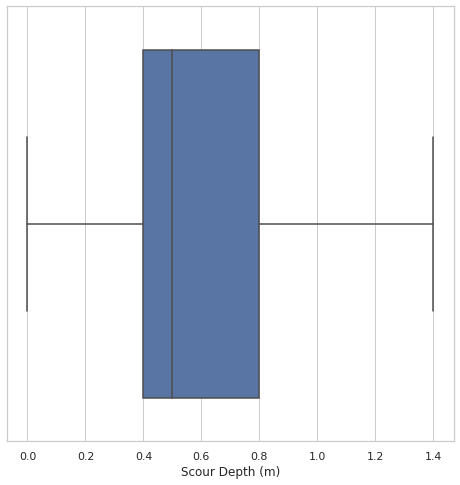

In [14]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Scour Depth (m)"])

In [15]:
df.shape

(410, 17)

In [16]:
df.head()

,Upstream/Downstream,Pier Type,Pier Shape,Pier Width (m),Pier Length (m),Skew (deg),Velocity (m/s),Depth(m),Debris Effects,Bed Material,D16 (mm),D50 (mm),D84 (mm),D95 (mm),Grad,Scour Depth (m),Accuracy (m)
0,NaN,NaN,NaN,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan
1,Upstream,Single,Sharp,1.8000,8.8000,0.0000,3.7000,5.5000,Unknown,Noncohesive,0.9200,5.0000,27.0000,83.0000,5.5000,1.1000,0.2000
2,Upstream,Single,Round,1.5000,11.2000,0.0000,1.5000,2.1000,Unknown,Noncohesive,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000,0.2000
3,Upstream,Single,Round,1.5000,11.2000,0.0000,0.9000,0.9000,Unknown,Noncohesive,0.3900,1.8000,8.0000,22.0000,4.6000,0.5000,0.2000
4,Upstream,Single,Round,1.5000,11.2000,0.0000,1.6000,2.0000,Unknown,Noncohesive,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000,0.2000


Removing NULL Row

In [17]:
df.drop(index = 0,inplace = True)
print(df.head())

  Upstream/Downstream Pier Type Pier Shape  Pier Width (m)  Pier Length (m)  \
1  Upstream            Single    Sharp     1.8000          8.8000             
2  Upstream            Single    Round     1.5000          11.2000            
3  Upstream            Single    Round     1.5000          11.2000            
4  Upstream            Single    Round     1.5000          11.2000            
5  Upstream            Single    Round     1.5000          11.2000            

   Skew (deg)  Velocity (m/s)  Depth(m) Debris Effects Bed Material  D16 (mm)  \
1 0.0000      3.7000          5.5000     Unknown        Noncohesive 0.9200      
2 0.0000      1.5000          2.1000     Unknown        Noncohesive 0.3900      
3 0.0000      0.9000          0.9000     Unknown        Noncohesive 0.3900      
4 0.0000      1.6000          2.0000     Unknown        Noncohesive 0.3900      
5 0.0000      1.0000          0.9000     Unknown        Noncohesive 0.3900      

   D50 (mm)  D84 (mm)  D95 (mm)   Grad

In [18]:
d = df

**ANALYSING CATEGORICAL VARIABLE**

In [19]:
df['Pier Shape'].unique()

array(['Sharp', 'Round', 'Square', 'Cylindrical'], dtype=object)

Text(0, 0.5, 'Frequency')

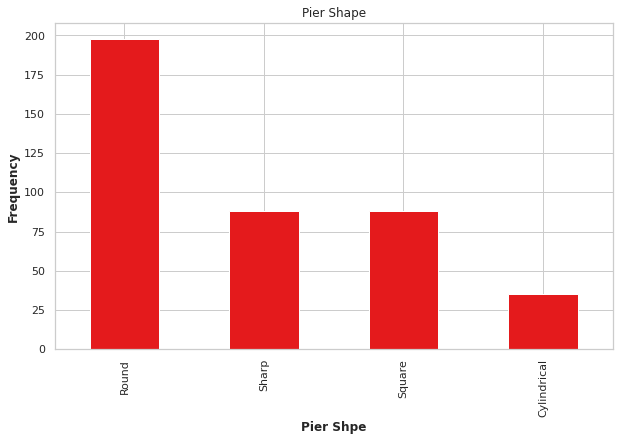

In [20]:
# Visualizing the different Pier shape available

plt.rcParams['figure.figsize'] = [10,6]
ax=df['Pier Shape'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('Pier Shape')
plt.xlabel("Pier Shpe",fontweight = 'bold')
plt.ylabel("Frequency",fontweight = 'bold')

**Round shape Pier are most common**

Analysing Pier scour value distribution

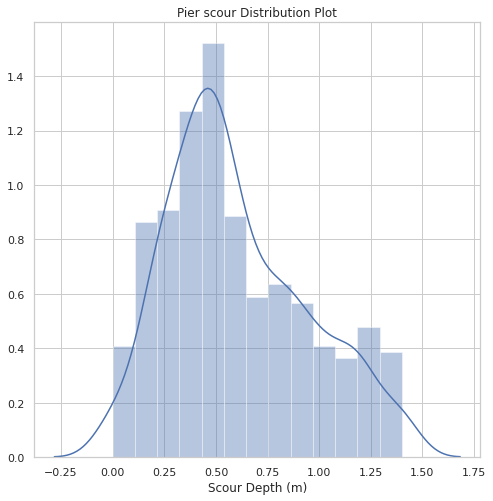

In [21]:
plt.figure(figsize=(8,8))

plt.title('Pier scour Distribution Plot')
sns.distplot(df["Scour Depth (m)"])

**Separating Numerical and categorical variables**

In [22]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

**removing accuracy from rest of values (Not usefull)**

In [23]:
accuracy = df['Accuracy (m)']
print(accuracy.head())

1   0.2000
2   0.2000
3   0.2000
4   0.2000
5   0.2000
Name: Accuracy (m), dtype: float64


In [24]:
print(accuracy.unique())

[0.2 0.3 0.1 0. ]


In [25]:
df.drop(columns = 'Accuracy (m)',inplace = True)

In [26]:
df.head()

,Upstream/Downstream,Pier Type,Pier Shape,Pier Width (m),Pier Length (m),Skew (deg),Velocity (m/s),Depth(m),Debris Effects,Bed Material,D16 (mm),D50 (mm),D84 (mm),D95 (mm),Grad,Scour Depth (m)
1,Upstream,Single,Sharp,1.8000,8.8000,0.0000,3.7000,5.5000,Unknown,Noncohesive,0.9200,5.0000,27.0000,83.0000,5.5000,1.1000
2,Upstream,Single,Round,1.5000,11.2000,0.0000,1.5000,2.1000,Unknown,Noncohesive,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000
3,Upstream,Single,Round,1.5000,11.2000,0.0000,0.9000,0.9000,Unknown,Noncohesive,0.3900,1.8000,8.0000,22.0000,4.6000,0.5000
4,Upstream,Single,Round,1.5000,11.2000,0.0000,1.6000,2.0000,Unknown,Noncohesive,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000
5,Upstream,Single,Round,1.5000,11.2000,0.0000,1.0000,0.9000,Unknown,Noncohesive,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000


In [27]:
df['Scour Depth (m)'].unique()

array([1.1, 0.6, 0.5, 0.3, 0.9, 1.2, 1.4, 0.8, 0.4, 0. , 0.2, 0.7, 0.1,
       1. , 1.3])

In [28]:
df_num.drop(columns = 'Accuracy (m)',inplace = True)
df_num.head()

,Pier Width (m),Pier Length (m),Skew (deg),Velocity (m/s),Depth(m),D16 (mm),D50 (mm),D84 (mm),D95 (mm),Grad,Scour Depth (m)
1,1.8000,8.8000,0.0000,3.7000,5.5000,0.9200,5.0000,27.0000,83.0000,5.5000,1.1000
2,1.5000,11.2000,0.0000,1.5000,2.1000,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000
3,1.5000,11.2000,0.0000,0.9000,0.9000,0.3900,1.8000,8.0000,22.0000,4.6000,0.5000
4,1.5000,11.2000,0.0000,1.6000,2.0000,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000
5,1.5000,11.2000,0.0000,1.0000,0.9000,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000


**Separating Diameter values based on unaviability of data** (these columns will be analysed separatly)

In [29]:
diameter = ['D16 (mm)', 'D50 (mm)', 'D84 (mm)', 'D95 (mm)', 'Grad']
df_num.drop(columns = diameter,inplace = True)
from sklearn import preprocessing
normalized_X = preprocessing.normalize(df_num)
print(normalized_X.shape)

(409, 6)


In [49]:
d_df = df.loc[:,diameter]
d_df.head()

,D16 (mm),D50 (mm),D84 (mm),D95 (mm),Grad
1,0.9200,5.0000,27.0000,83.0000,5.5000
2,0.3900,1.8000,8.0000,22.0000,4.6000
3,0.3900,1.8000,8.0000,22.0000,4.6000
4,0.3900,1.8000,8.0000,22.0000,4.6000
5,0.3900,1.8000,8.0000,22.0000,4.6000


In [31]:
d_df.dtypes

D16 (mm)    float64
D50 (mm)    float64
D84 (mm)    float64
D95 (mm)    float64
Grad        float64
dtype: object

In [32]:
print(normalized_X)

[[0.16046503 0.78449571 0.         0.32984479 0.49030982 0.09806196]
 [0.12923833 0.96497954 0.         0.12923833 0.18093366 0.05169533]
 [0.13178191 0.98397158 0.         0.07906914 0.07906914 0.0439273 ]
 ...
 [0.01109302 0.2699301  0.96139489 0.02958138 0.03697673 0.02218604]
 [0.01109302 0.2699301  0.96139489 0.02958138 0.03697673 0.02218604]
 [0.01795185 0.43682825 0.8975923  0.04188764 0.03590369 0.0119679 ]]


**storing normalised numerical values in separate dataframe**

In [33]:
nor_df = pd.DataFrame(data = normalized_X ,columns=["Pier_Width", "Pier_Length", "Skew", "Velocity", "depth", "scour_depth"])
print(nor_df.head())

   Pier_Width  Pier_Length   Skew  Velocity  depth  scour_depth
0 0.1605      0.7845       0.0000 0.3298    0.4903 0.0981      
1 0.1292      0.9650       0.0000 0.1292    0.1809 0.0517      
2 0.1318      0.9840       0.0000 0.0791    0.0791 0.0439      
3 0.1293      0.9653       0.0000 0.1379    0.1724 0.0517      
4 0.1316      0.9828       0.0000 0.0878    0.0790 0.0527      


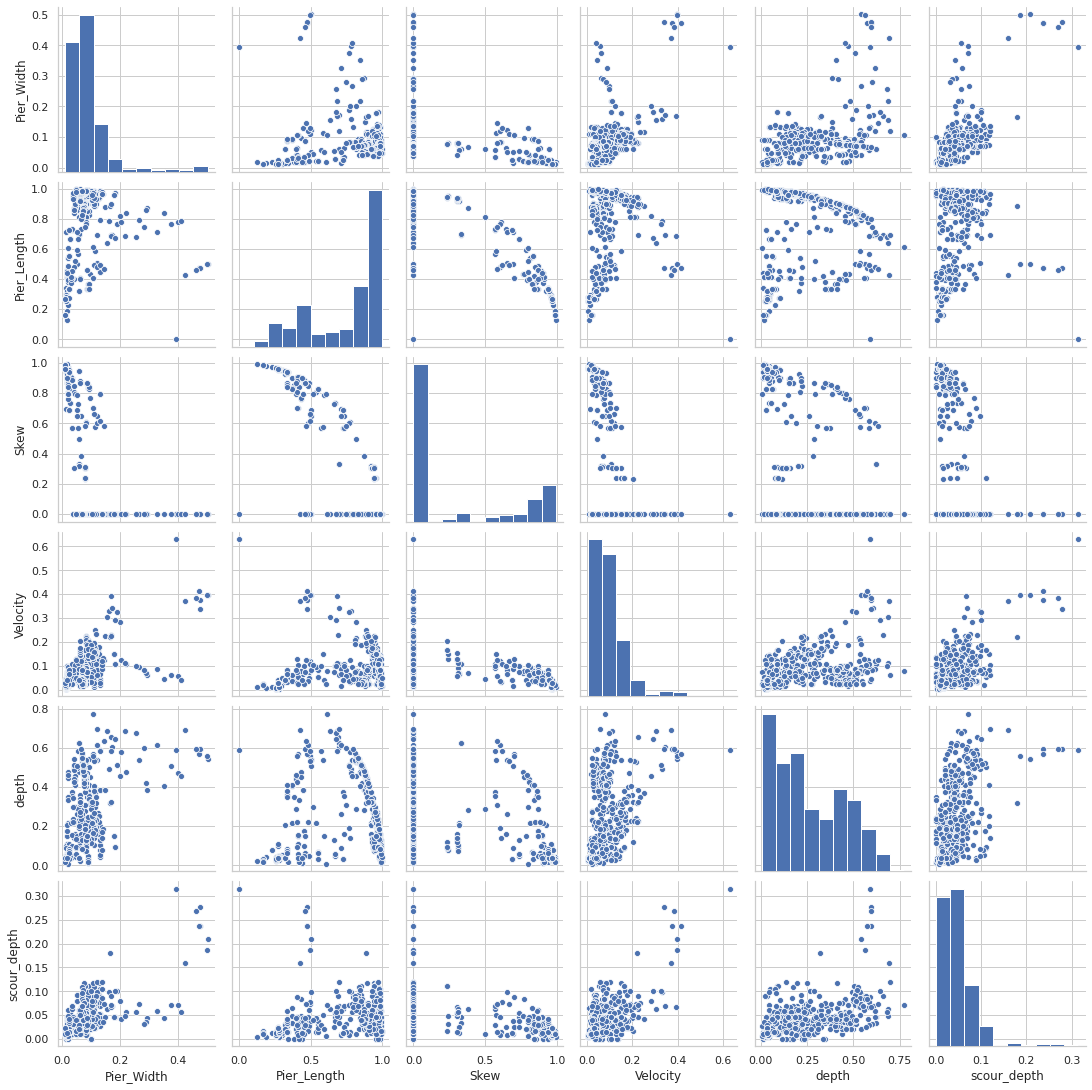

In [34]:
ax = sns.pairplot(nor_df)

**Scour Depth**
* scour depth have some +ve correlation with Pier width, velocity ,Depth
* scour Depth have very insignificant -ve correlation with pier length , Skew 

In [35]:
print(df_cat)

    Upstream/Downstream Pier Type Pier Shape Debris Effects Bed Material
1    Upstream            Single    Sharp      Unknown        Noncohesive
2    Upstream            Single    Round      Unknown        Noncohesive
3    Upstream            Single    Round      Unknown        Noncohesive
4    Upstream            Single    Round      Unknown        Noncohesive
5    Upstream            Single    Round      Unknown        Noncohesive
..        ...               ...      ...          ...                ...
483  Downstream          Single    Sharp      Unknown        Noncohesive
484  Downstream          Single    Sharp      Unknown        Noncohesive
485  Upstream            Single    Square     Unknown        Noncohesive
486  Downstream          Single    Square     Unknown        Noncohesive
487  Upstream            Single    Square     Unknown        Noncohesive

[409 rows x 5 columns]


**EDA of categorical variables**

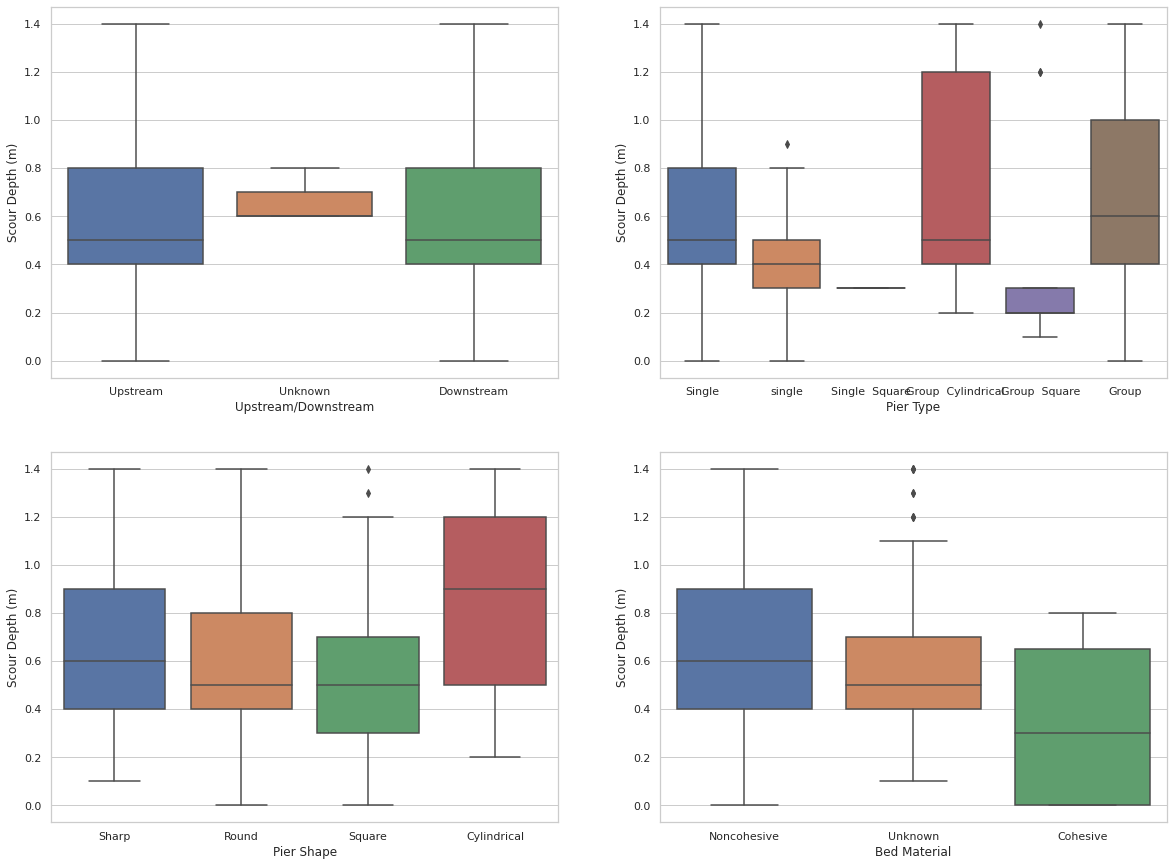

In [36]:
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.boxplot(x = 'Upstream/Downstream', y = 'Scour Depth (m)', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'Pier Type', y = 'Scour Depth (m)', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'Pier Shape', y = 'Scour Depth (m)', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'Bed Material', y = 'Scour Depth (m)', data = df)

* Scour Depth dosen't have any effect based of current as both upstream and downstream have almost similer distribution
* Pier Type seems to have impact on Scour depth as can be seen from boxplot 2
* Pier shape looks to have impact on scour depth pier with shape of round and sharp have almost same distribution 
* Bed material seems to have strong impact on scour depth 

# Very important
**Taking care of erronious data (Dataset have some errors)**

In [37]:
unknown = ['Unknown',' Unknown','Unknown     Noncohesive']
Insignificant = ['Insignificant',' Insignificant','Insignificant Cohesive','Insignificant Noncohesive']
Substantial = [' Substantial','Substantial   Noncohesive','Substantial']
Moderate = ['Moderate      Noncohesive','Moderate']
for i in df.index:
    if df['Debris Effects'][i] in unknown:
        df['Debris Effects'][i] = "Unknown"
    if df['Debris Effects'][i] in Insignificant:
        df['Debris Effects'][i] = "Insignificant"
    if df['Debris Effects'][i] in Substantial:
        df['Debris Effects'][i] = "Substantial"
    if df['Debris Effects'][i] in Moderate:
        df['Debris Effects'][i] = "Moderate"

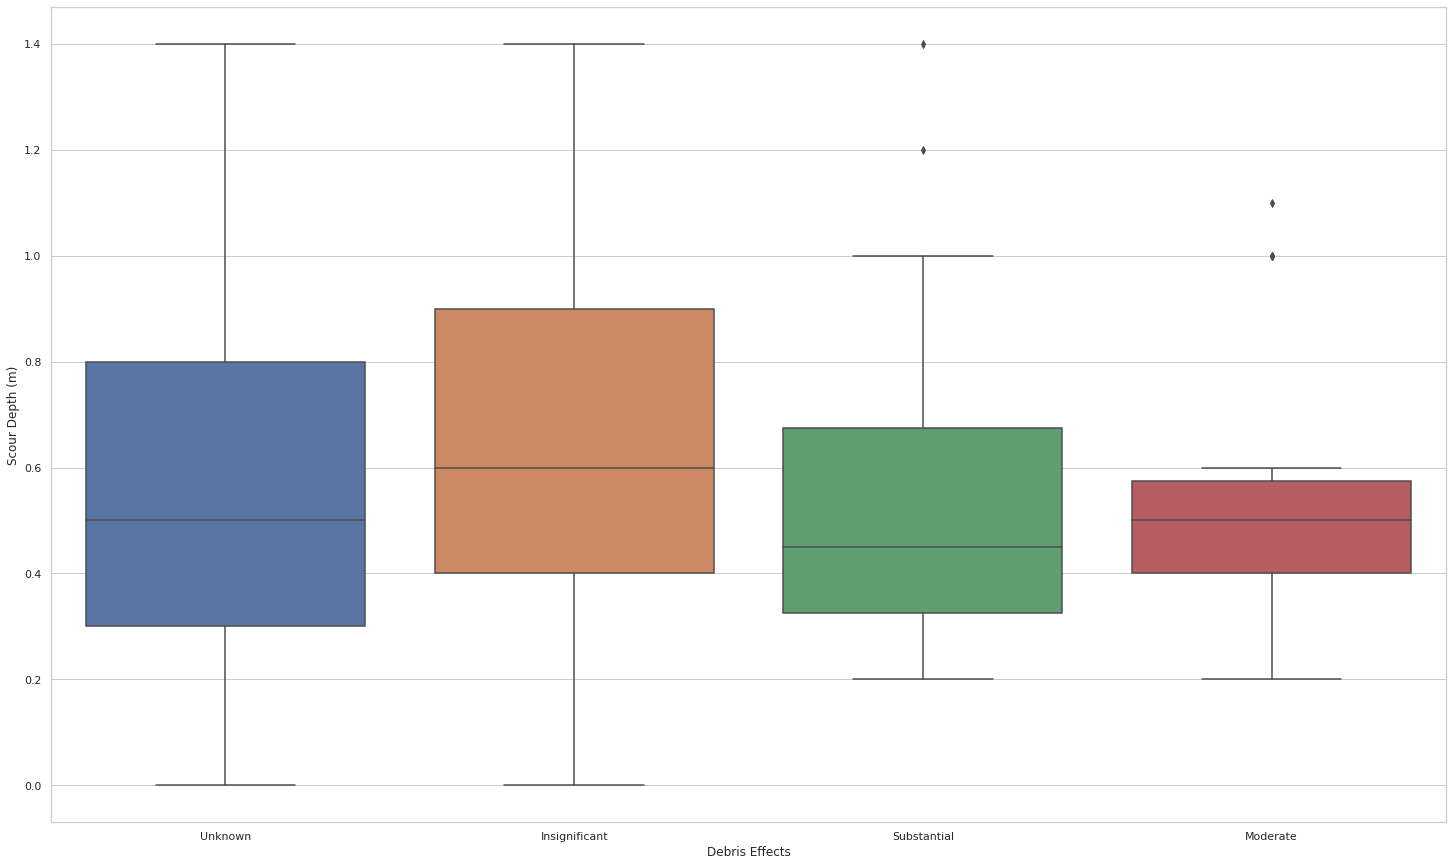

In [38]:
plt.figure(figsize=(25, 15))
sns.boxplot(x = 'Debris Effects', y = 'Scour Depth (m)', data = df)

**Debris Effect**
* dataset with unknown values semm no harm as they alomst distributed across entire range of scour depth values
* as Debris effect seems to increase from insignificant to substantial to moderate scour depth converges to a range of 0.2-0.6


In [39]:
df.head()

,Upstream/Downstream,Pier Type,Pier Shape,Pier Width (m),Pier Length (m),Skew (deg),Velocity (m/s),Depth(m),Debris Effects,Bed Material,D16 (mm),D50 (mm),D84 (mm),D95 (mm),Grad,Scour Depth (m)
1,Upstream,Single,Sharp,1.8000,8.8000,0.0000,3.7000,5.5000,Unknown,Noncohesive,0.9200,5.0000,27.0000,83.0000,5.5000,1.1000
2,Upstream,Single,Round,1.5000,11.2000,0.0000,1.5000,2.1000,Unknown,Noncohesive,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000
3,Upstream,Single,Round,1.5000,11.2000,0.0000,0.9000,0.9000,Unknown,Noncohesive,0.3900,1.8000,8.0000,22.0000,4.6000,0.5000
4,Upstream,Single,Round,1.5000,11.2000,0.0000,1.6000,2.0000,Unknown,Noncohesive,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000
5,Upstream,Single,Round,1.5000,11.2000,0.0000,1.0000,0.9000,Unknown,Noncohesive,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000


**Diameter variables**

In [50]:
d_df['scour_depth'] = df['Scour Depth (m)']

In [51]:
d_df.head()

,D16 (mm),D50 (mm),D84 (mm),D95 (mm),Grad,scour_depth
1,0.9200,5.0000,27.0000,83.0000,5.5000,1.1000
2,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000
3,0.3900,1.8000,8.0000,22.0000,4.6000,0.5000
4,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000
5,0.3900,1.8000,8.0000,22.0000,4.6000,0.6000


**dropping emtpy values**

In [52]:
droping_value = []
for i in d_df.index:
    if d_df['D16 (mm)'][i] > 1999:
        droping_value.append(i)
print(droping_value)

[190, 191, 192, 193, 299, 300, 302]


In [53]:
d_df.drop(index = droping_value,inplace = True)

In [54]:
d_df.describe()

,D16 (mm),D50 (mm),D84 (mm),D95 (mm),Grad,scour_depth
count,402.0000,402.0000,402.0000,402.0000,402.0000,402.0000
mean,5.6903,13.2512,28.7651,44.2363,3.4756,0.6085
std,12.2616,22.6388,46.6155,68.8652,2.5811,0.3363
min,0.0100,0.1200,0.2500,0.3500,1.2000,0.0000
25%,0.3000,0.6700,1.6000,2.8175,2.2000,0.4000
50%,0.3900,1.0500,5.0000,10.4000,2.4500,0.5000
75%,4.1000,19.0000,44.0000,63.0000,3.7750,0.8000
max,68.0000,108.0000,233.0000,350.0000,21.8000,1.4000


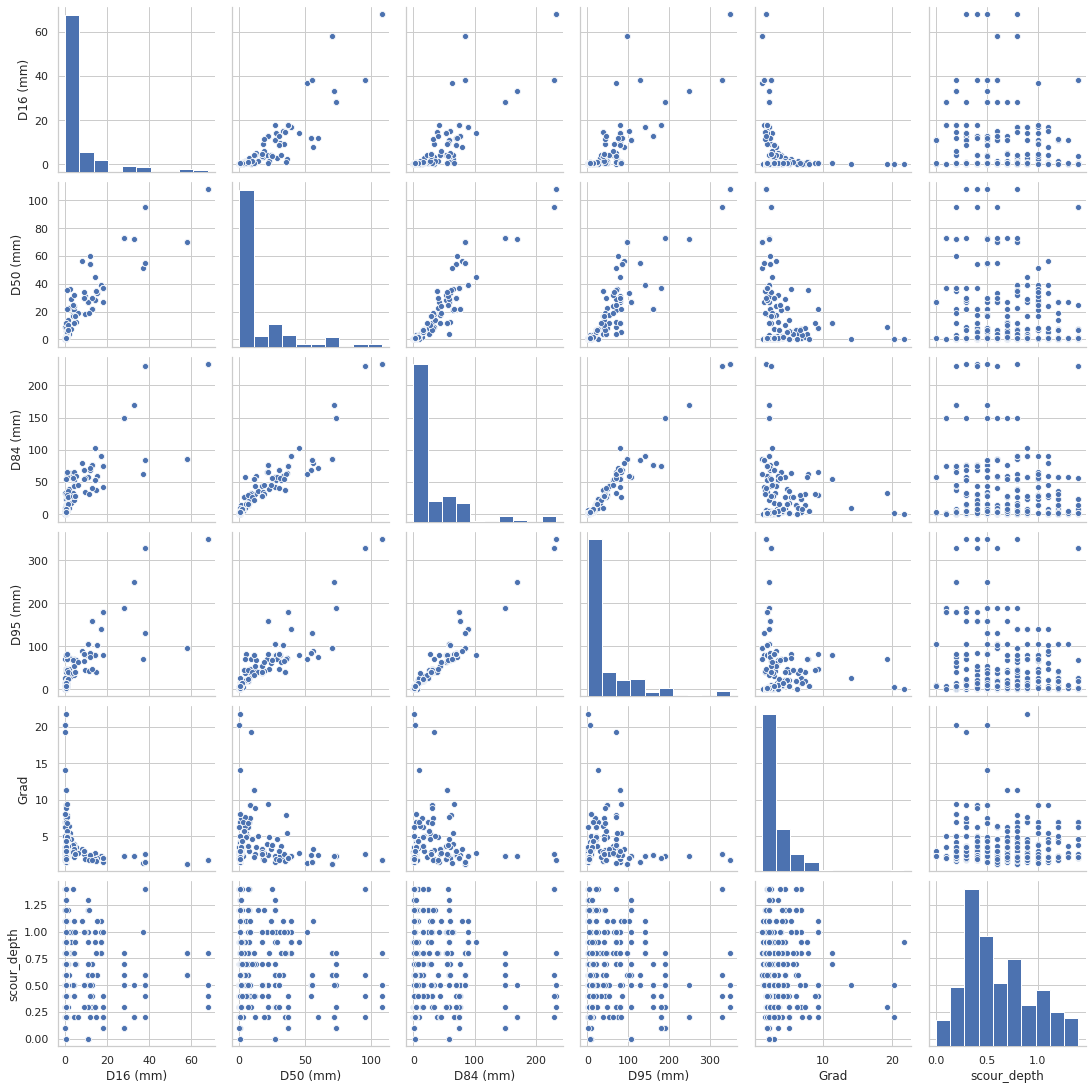

In [46]:
ax = sns.pairplot(d_df)

**diameter variables have very high correlation between each other**

In [55]:
d_df.corr()

,D16 (mm),D50 (mm),D84 (mm),D95 (mm),Grad,scour_depth
D16 (mm),1.0000,0.9238,0.8534,0.8266,-0.2464,-0.0340
D50 (mm),0.9238,1.0000,0.9634,0.9216,-0.1827,-0.0110
D84 (mm),0.8534,0.9634,1.0000,0.9767,-0.1125,-0.0116
D95 (mm),0.8266,0.9216,0.9767,1.0000,-0.1121,-0.0436
Grad,-0.2464,-0.1827,-0.1125,-0.1121,1.0000,-0.0026
scour_depth,-0.0340,-0.0110,-0.0116,-0.0436,-0.0026,1.0000


**it will be a good move to use only D50 in further analysis as it is very correlated to every other diameter value**

In [57]:
nor_d_df = preprocessing.normalize(d_df)
print(nor_d_df)

[[0.01050123 0.05707188 0.30818813 0.94739313 0.06277906 0.01255581]
 [0.01629373 0.07520185 0.33423043 0.91913369 0.1921825  0.02506728]
 [0.0162953  0.07520907 0.33426252 0.91922194 0.19220095 0.02089141]
 ...
 [0.04732349 0.11121021 0.41526366 0.82579498 0.35492621 0.07098524]
 [0.04732349 0.11121021 0.41526366 0.82579498 0.35492621 0.07098524]
 [0.04742983 0.11146011 0.41619679 0.82765059 0.35572375 0.02371492]]


**Normalising data**

In [59]:
diameter_normalised = pd.DataFrame(data = nor_d_df ,columns=["D16", "D50", "D84", "D95",'Grad',"scour_depth"])
print(diameter_normalised.head())

     D16    D50    D84    D95   Grad  scour_depth
0 0.0105 0.0571 0.3082 0.9474 0.0628 0.0126      
1 0.0163 0.0752 0.3342 0.9191 0.1922 0.0251      
2 0.0163 0.0752 0.3343 0.9192 0.1922 0.0209      
3 0.0163 0.0752 0.3342 0.9191 0.1922 0.0251      
4 0.0163 0.0752 0.3342 0.9191 0.1922 0.0251      


In [114]:
droping_diameters = ['D16','D84','D95']
diameter_df = diameter_normalised.drop(columns = droping_diameters)
diameter_df.head()

,D50,Grad,scour_depth
0,0.0571,0.0628,0.0126
1,0.0752,0.1922,0.0251
2,0.0752,0.1922,0.0209
3,0.0752,0.1922,0.0251
4,0.0752,0.1922,0.0251


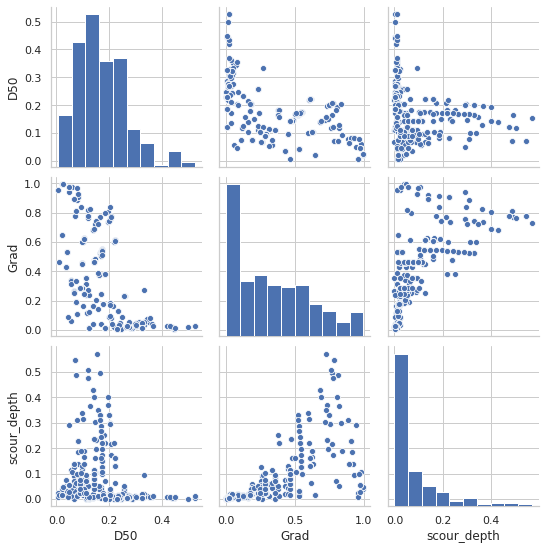

In [115]:
ax = sns.pairplot(diameter_df)

In [116]:
diameter_df.corr()

,D50,Grad,scour_depth
D50,1.0000,-0.5340,-0.2081
Grad,-0.5340,1.0000,0.6826
scour_depth,-0.2081,0.6826,1.0000


* **D50 have negative Correlation with Scour Depth**
* **Grad have significantly high correlation value**

In [61]:
X = pd.DataFrame(nor_df)
X.head()

,Pier_Width,Pier_Length,Skew,Velocity,depth,scour_depth
0,0.1605,0.7845,0.0000,0.3298,0.4903,0.0981
1,0.1292,0.9650,0.0000,0.1292,0.1809,0.0517
2,0.1318,0.9840,0.0000,0.0791,0.0791,0.0439
3,0.1293,0.9653,0.0000,0.1379,0.1724,0.0517
4,0.1316,0.9828,0.0000,0.0878,0.0790,0.0527


**dummy variables for the categorical feature and store it in a new variable - 'dummies'**

In [62]:
cat_col = df.select_dtypes(include=['object']).columns
print(cat_col)

Index(['Upstream/Downstream', 'Pier Type', 'Pier Shape', 'Debris Effects',
       'Bed Material'],
      dtype='object')


In [63]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df[cat_col])
dummies.shape

(409, 20)

In [64]:
dummies.head()

,Upstream/Downstream_Downstream,Upstream/Downstream_Unknown,Upstream/Downstream_Upstream,Pier Type_Group,Pier Type_Group Cylindrical,Pier Type_Group Square,Pier Type_Single,Pier Type_Single Square,Pier Type_single,Pier Shape_Cylindrical,Pier Shape_Round,Pier Shape_Sharp,Pier Shape_Square,Debris Effects_Insignificant,Debris Effects_Moderate,Debris Effects_Substantial,Debris Effects_Unknown,Bed Material_Cohesive,Bed Material_Noncohesive,Bed Material_Unknown
1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
4,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0


**dropping first value from each category in variable**

In [65]:
dummies = pd.get_dummies(df[cat_col], drop_first = True)
dummies.shape

(409, 15)

**resetting index for safe concatination**

In [66]:
dummies.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
dummies.head()

,Upstream/Downstream_Unknown,Upstream/Downstream_Upstream,Pier Type_Group Cylindrical,Pier Type_Group Square,Pier Type_Single,Pier Type_Single Square,Pier Type_single,Pier Shape_Round,Pier Shape_Sharp,Pier Shape_Square,Debris Effects_Moderate,Debris Effects_Substantial,Debris Effects_Unknown,Bed Material_Noncohesive,Bed Material_Unknown
0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
2,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
3,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0


In [67]:
# Add the results to the original dataframe

X = pd.concat([X, dummies], axis = 1)
X.shape

(409, 21)

In [68]:
X.head()

,Pier_Width,Pier_Length,Skew,Velocity,depth,scour_depth,Upstream/Downstream_Unknown,Upstream/Downstream_Upstream,Pier Type_Group Cylindrical,Pier Type_Group Square,Pier Type_Single,Pier Type_Single Square,Pier Type_single,Pier Shape_Round,Pier Shape_Sharp,Pier Shape_Square,Debris Effects_Moderate,Debris Effects_Substantial,Debris Effects_Unknown,Bed Material_Noncohesive,Bed Material_Unknown
0,0.1605,0.7845,0.0000,0.3298,0.4903,0.0981,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
1,0.1292,0.9650,0.0000,0.1292,0.1809,0.0517,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
2,0.1318,0.9840,0.0000,0.0791,0.0791,0.0439,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
3,0.1293,0.9653,0.0000,0.1379,0.1724,0.0517,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
4,0.1316,0.9828,0.0000,0.0878,0.0790,0.0527,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0


# Model Preparation

splitting data in train and test 

In [69]:
df_train, df_test = train_test_split(X, train_size = 0.9, test_size = 0.1, random_state = 0)

In [70]:
df_train.corr()

,Pier_Width,Pier_Length,Skew,Velocity,depth,scour_depth,Upstream/Downstream_Unknown,Upstream/Downstream_Upstream,Pier Type_Group Cylindrical,Pier Type_Group Square,Pier Type_Single,Pier Type_Single Square,Pier Type_single,Pier Shape_Round,Pier Shape_Sharp,Pier Shape_Square,Debris Effects_Moderate,Debris Effects_Substantial,Debris Effects_Unknown,Bed Material_Noncohesive,Bed Material_Unknown
Pier_Width,1.0000,0.1495,-0.4511,0.6161,0.4833,0.6855,0.1672,0.0705,-0.0712,-0.0708,0.2594,-0.0432,-0.2695,-0.0238,-0.1234,-0.0590,-0.0034,-0.0205,-0.1839,0.0989,-0.0881
Pier_Length,0.1495,1.0000,-0.8835,0.1241,0.1309,0.0681,-0.1107,0.3552,0.1241,0.0792,0.3542,-0.0412,-0.3507,0.4621,-0.1628,-0.2689,0.1125,-0.1338,0.2052,-0.3493,0.3739
Skew,-0.4511,-0.8835,1.0000,-0.3663,-0.4389,-0.3523,-0.0635,-0.3321,-0.1229,-0.1286,-0.3942,0.0736,0.4663,-0.4390,0.2127,0.2857,-0.0629,0.1375,-0.1615,0.3865,-0.4102
Velocity,0.6161,0.1241,-0.3663,1.0000,0.3735,0.6460,0.4016,-0.0424,-0.1563,-0.1030,0.2363,-0.0274,-0.1035,0.0475,0.0702,-0.2116,0.0117,0.0050,-0.1160,0.2019,-0.1931
depth,0.4833,0.1309,-0.4389,0.3735,1.0000,0.4409,0.1728,0.0972,0.0476,0.2249,-0.0449,-0.0563,-0.3225,0.1064,-0.3135,-0.0215,-0.1276,-0.1294,0.0002,-0.2617,0.2708
scour_depth,0.6855,0.0681,-0.3523,0.6460,0.4409,1.0000,0.2310,0.0163,-0.0034,-0.0254,0.1039,-0.0326,-0.1519,-0.0075,-0.1238,-0.0933,-0.0050,0.0391,-0.1171,-0.0022,0.0089
Upstream/Downstream_Unknown,0.1672,-0.1107,-0.0635,0.4016,0.1728,0.2310,1.0000,-0.2399,-0.0159,-0.0166,0.0478,-0.0047,-0.0280,-0.0268,0.0967,-0.0463,-0.0200,-0.0173,-0.1198,0.0539,-0.0531
Upstream/Downstream_Upstream,0.0705,0.3552,-0.3321,-0.0424,0.0972,0.0163,-0.2399,1.0000,0.0663,0.0694,0.2590,-0.1381,-0.3499,0.2158,-0.0346,-0.2537,0.0832,-0.1502,-0.0299,-0.2058,0.2214
Pier Type_Group Cylindrical,-0.0712,0.1241,-0.1229,-0.1563,0.0476,-0.0034,-0.0159,0.0663,1.0000,-0.0322,-0.3331,-0.0092,-0.0542,-0.1690,-0.0940,-0.0896,-0.0386,-0.0336,0.1328,-0.2955,0.2997
Pier Type_Group Square,-0.0708,0.0792,-0.1286,-0.1030,0.2249,-0.0254,-0.0166,0.0694,-0.0322,1.0000,-0.3484,-0.0096,-0.0567,-0.1767,-0.0983,0.3599,-0.0404,-0.0351,0.0435,-0.2045,0.2082


**out of all numerical variables Pier width , velocity and depth have strong +ve correlation **

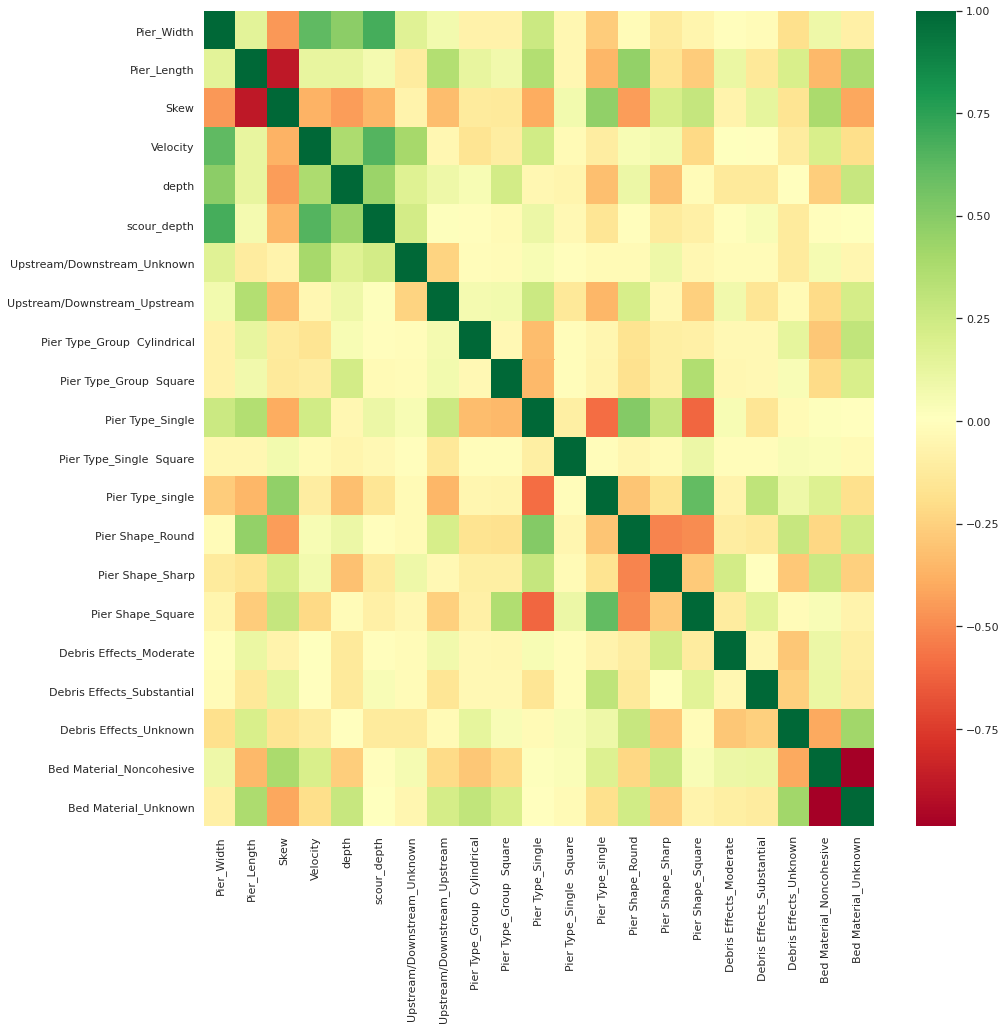

In [71]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 15))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

**plotting scour depth vs Pier width**

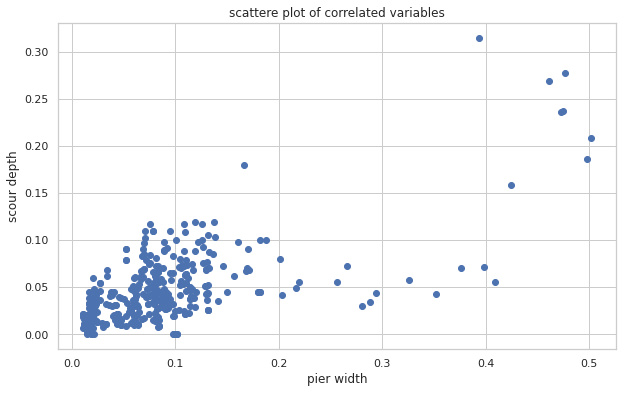

In [72]:
plt.scatter(X['Pier_Width'], X['scour_depth'])
plt.title('scattere plot of correlated variables')
plt.xlabel('pier width')
plt.ylabel('scour depth')
plt.show()

**plotting scour depth vs Velocity**

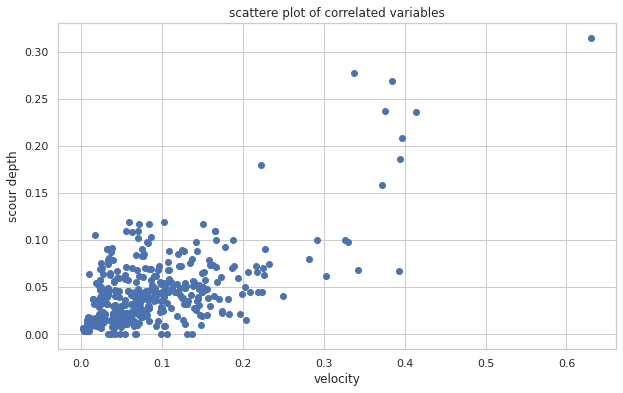

In [73]:
plt.scatter(X['Velocity'], X['scour_depth'])
plt.title('scattere plot of correlated variables')
plt.xlabel('velocity')
plt.ylabel('scour depth')
plt.show()

**plotting scour depth V/S Depth**

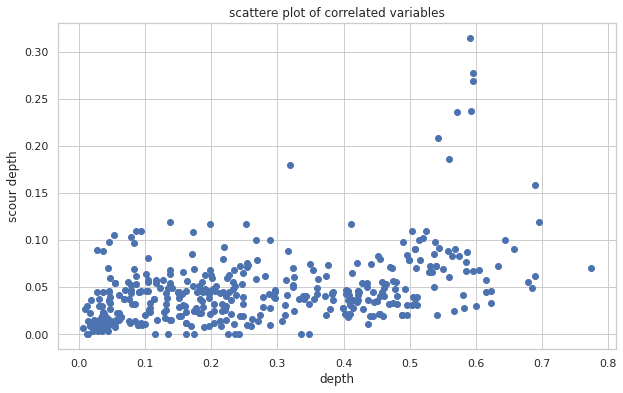

In [74]:
plt.scatter(X['depth'],X['scour_depth'])
plt.title('scattere plot of correlated variables')
plt.xlabel('depth')
plt.ylabel('scour depth')
plt.show()

**separating dependent variable from data set**

In [75]:
y_train = df_train.pop('scour_depth')
X_train = df_train

In [76]:
y_test = df_test.pop('scour_depth')
X_test = df_test

**making first OLS model with only linear Pier width values**

In [78]:
X_train_1 = X_train['Pier_Width']

In [80]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [81]:
# Check parameters created

lr_1.params

const        0.0173
Pier_Width   0.3345
dtype: float64

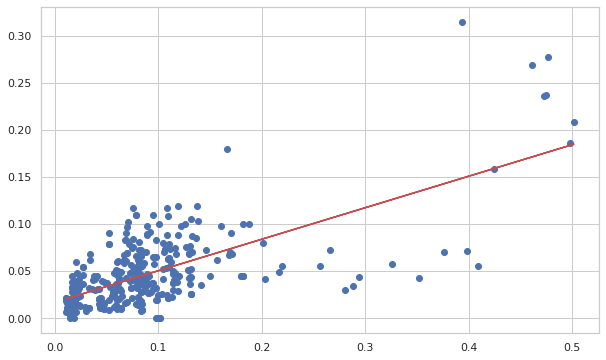

In [83]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.3345*X_train_1c.iloc[:, 1] + 0.0173, 'r')
plt.show()

In [84]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:            scour_depth   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     324.5
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.17e-52
Time:                        20:23:24   Log-Likelihood:                 782.61
No. Observations:                 368   AIC:                            -1561.
Df Residuals:                     366   BIC:                            -1553.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0173      0.002      7.698      0.0

**Making second model with quadratic values of Pier Width**

In [85]:
X_train_poly = pd.DataFrame(X_train_1)

In [86]:
X_train_poly.head()

,Pier_Width
357,0.0680
294,0.1071
402,0.0694
6,0.1267
1,0.1292


In [89]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly2 = polynomial_features.fit_transform(X_train_poly)
x_poly2.shape

(368, 3)

In [90]:
import statsmodels.api as sm

model2 = sm.OLS(y_train, X_train_poly).fit()

In [91]:
model2.params

Pier_Width   0.4406
dtype: float64

In [92]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            scour_depth   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              1081.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                   1.88e-111
Time:                        20:25:58   Log-Likelihood:                          755.00
No. Observations:                 368   AIC:                                     -1508.
Df Residuals:                     367   BIC:                                     -1504.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pier_Width     0.4406      0.013     32.885      0.000       0.414       0.467
==============================================================================
Omnibus:                       47.959   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.963
Skew:                          -0.440   Prob(JB):                     4.21e-46
Kurtosis:                       6.585   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Significant accuracy is coming with quadratic values of Pier Width**

**Making a OLS model with only quadratic value of velocity**

In [96]:
X_train_poly2 = X_train[['Velocity']]

In [97]:
X_train_poly2.head()

,Velocity
357,0.0755
294,0.1285
402,0.0833
6,0.1352
1,0.1292


In [102]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly3 = polynomial_features.fit_transform(X_train_poly2)
x_poly3.shape

(368, 3)

In [108]:
import statsmodels.api as sm

model3 = sm.OLS(y_train, x_poly3).fit()

In [109]:
model3.params

const   0.0315
x1      0.0520
x2      0.7328
dtype: float64

In [111]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            scour_depth   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     170.1
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           6.42e-53
Time:                        20:37:32   Log-Likelihood:                 786.99
No. Observations:                 368   AIC:                            -1568.
Df Residuals:                     365   BIC:                            -1556.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0315      0.003      9.875      0.0